In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pathlib

# Prática
## Classificacao CNN
1. Aquisição e pré-processamento dos dados
2. Treinamento
* Implementar arquitetura
* Definir otimizadores, métricas e regularizadores
3. Teste (avaliação de desempenho)
## Deteccao CNN
1. Usar a lib super_gradients(https://github.com/Deci-AI/super-gradients)
2. Utilizar Yolox_nano,PP-YOLOE small ou SSD lite MobileNet v2
   1. Para checar hiperparametros disponíveis:
      1. https://github.com/Deci-AI/super-gradients/tree/master/src/super_gradients/recipes
   2. Para checar modelos disponiveis
      1. https://docs.deci.ai/super-gradients/latest/documentation/source/model_zoo.html#computer-vision-models-pretrained-checkpoints
3. Visualizar resultados
## Segmentacao CNN
   1. Usar lib segmentation_models(https://github.com/qubvel/segmentation_models)
   2. Usar mobilenet,mobilenetv2 ou seresnet18 como backbone
   3. Usar FPN como arquitetura base
   4. Visualizar resultados

# Prática - Tumor

#### 1. Aquisição dos dados


In [2]:
path = '../../Datasets/Data'
data = pathlib.Path(path)

In [3]:
data

WindowsPath('../../Datasets/Data')

In [4]:
list(data.glob('**/*.jpg'))[:2]

[]

In [5]:
list(data.glob('glioma_tumor/*.jpg'))[:5]

[]

In [7]:
disease.keys()

dict_keys(['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor'])

In [8]:
labels = {
    "glioma_tumor" : 0,
    "meningioma_tumor":1,
    "normal":2,
    "pituitary_tumor":3
}

In [9]:
import os
import cv2

In [10]:
directory=os.listdir(path)
for each in disease.keys():
    plt.figure(figsize=(10, 10))
    currentFolder = path + '/' + each
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = path + '/' + each + "/" + file
        img=cv2.imread(fullpath)
        ax=plt.subplot(1,5,i+1)
        ax.set_title(each)
        plt.imshow(img)

FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: '../../Datasets/Data'

## Carregamento dos dados

In [ ]:
X = []
Y = []
for name, diseases in disease.items():
    for disease in diseases:
        img = cv2.imread(str(disease))
        img = img.astype('float32') / 255.0
        X.append(img)
        Y.append(labels[name])     

In [ ]:
X

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 array([[[0., 0., 0.],
         [0., 0.,

In [ ]:
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
print(set(Y))

print(Y.count(0))
print(Y.count(1))
print(Y.count(2))
print(Y.count(3))

{0, 1, 2, 3}
901
913
438
844


In [ ]:
X= np.array(X)
Y= np.array(Y)

In [ ]:
X.shape

(3096, 256, 256, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2476, 256, 256, 3)
(2476,)
(620, 256, 256, 3)
(620,)


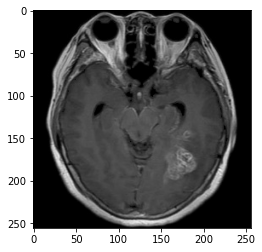

In [ ]:
# Escolhendo uma imagem para plotar
sample = 10
image = X_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image)
plt.show()

In [ ]:
y_train

array([2, 3, 0, ..., 1, 3, 3])

#### 2. Pré-processamento

#### Normalização

#### One hot encoder na variável alvo

In [ ]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()


y_train

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

#### 3. Particionamento de base de dados

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, X_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((1980, 256, 256, 3),
 (496, 256, 256, 3),
 (620, 256, 256, 3),
 (1980, 4),
 (496, 4),
 (620, 4))

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias par o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [ ]:
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2d,MaxPool
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [ ]:
rede_simples = Sequential()

rede_simples.add(Conv2D(3,3, input_dim = (None, 256, 256)))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Conv2D(3,3))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Conv2D(3,3))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Flatten())
rede_simples.add(Dense(4))
rede_simples.add(Activation('softmax'))



In [ ]:
import tensorflow as tf

rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')
    
historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 50, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/50
31/31 [==============================] - 8s 208ms/step - loss: 11.5065 - accuracy: 0.2793 - val_loss: 1.4365 - val_accuracy: 0.3569
Epoch 2/50
31/31 [==============================] - 6s 194ms/step - loss: 1.9560 - accuracy: 0.3247 - val_loss: 1.3502 - val_accuracy: 0.3286
Epoch 3/50
31/31 [==============================] - 6s 195ms/step - loss: 1.3680 - accuracy: 0.3348 - val_loss: 1.3292 - val_accuracy: 0.3629
Epoch 4/50
31/31 [==============================] - 7s 218ms/step - loss: 1.3275 - accuracy: 0.3641 - val_loss: 1.3111 - val_accuracy: 0.3589
Epoch 5/50
31/31 [==============================] - 7s 218ms/step - loss: 1.3008 - accuracy: 0.3899 - val_loss: 1.2606 - val_accuracy: 0.4032
Epoch 6/50
31/31 [==============================] - 6s 209ms/step - loss: 1.3492 - accuracy: 0.3051 - val_loss: 1.3399 - val_accuracy: 0.2823
Epoch 7/50
31/31 [==============================] - 7s 216ms/step - loss: 1.3354 - accuracy: 0.3348 - val_loss: 1.3110 - val_accuracy: 0.3407
Epoch

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(X_test)

print(accuracy_score(y_test.argmax(1), pred_simples.argmax(1)))
print(confusion_matrix(y_test.argmax(1), pred_simples.argmax(1)))

20/20 [==============================] - 1s 53ms/step
0.6016129032258064
[[142  28   0   8]
 [ 80  81   0  13]
 [ 12  62   4   2]
 [ 21  21   0 146]]


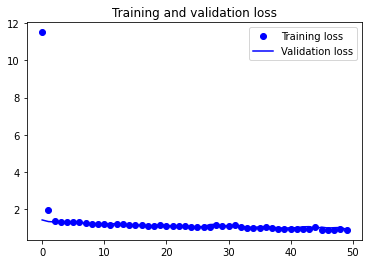

In [ ]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()